# CS2806--Machine Learning Techniques Lab -- Cyber

**Name : Roahith R**

**Registration_Number : 22011103048**

# Lab 2 (02-01-2024)

This lab experiments help you master how to perform basic data analysis and preliminary data visualization.



In [50]:
# Python Program to Get IP Address
import socket
hostname = socket.gethostname()
IPAddr = socket.gethostbyname(hostname)

print("My name is " + "Roahith R" + " and my roll no : " + "22011103048")
print("Computer IP Address is: " + IPAddr)

My name is Roahith R and my roll no : 22011103048
Computer IP Address is: 10.17.243.246


## Experiment 1
Load iris dataset using scikit learn.



In [51]:
# Experiment 1
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()
X = np.array(iris["data"])
Y = np.array(iris["target"])
category_names = iris["target_names"]
feature_names = iris["feature_names"]


In [52]:
# Description of the IRIS Dataset
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [53]:
# use pandas to describe the dataset. verify with the above.

import pandas as pd
import sklearn.datasets as source

data = source.load_iris()

# print(data)
#Load all the feature columns from iris into dataframe
df = pd.DataFrame(data = data['data'], columns = data.feature_names)
df['Target'] = data.target

df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)   
0                  5.1               3.5                1.4               0.2  \
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8  

In [54]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [55]:
sepal_info = df['sepal length (cm)']
print(f"""
       MIN VALUE : {sepal_info.min()}
       MAX VALUE : {sepal_info.max()}
       MEAN VALUE : {sepal_info.mean()}
       STANDARD DEVIATION : {sepal_info.std()}""")


       MIN VALUE : 4.3
       MAX VALUE : 7.9
       MEAN VALUE : 5.843333333333334
       STANDARD DEVIATION : 0.828066127977863


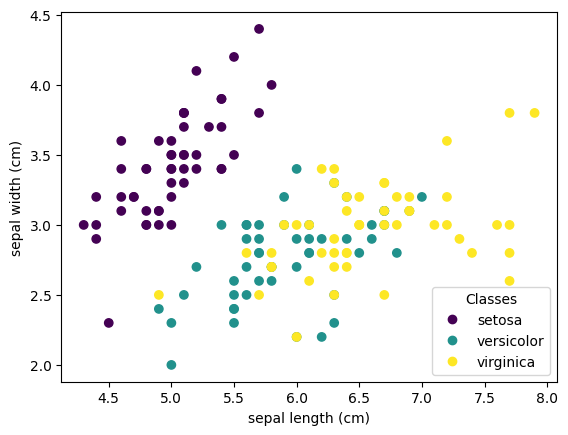

In [56]:
# Below code produces a scatter plot
_, ax = plt.subplots()
scatter = ax.scatter(X[:, 0], X[:, 1], c=Y)
ax.set(xlabel=feature_names[0], ylabel=feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], category_names, loc="lower right", title="Classes"
)

### What is the inference from above plot?

* This is a scatter plot between sepal width (cm) and  sepal length (cm) for 3 different flower classes Setosa, Versicolor, Virginica.
* Setosa has  larger sepal width and smaller sepal length (Inverse Relation)
* Versicolor and Virginica have smaller sepal width and Larger sepal length (Inverse Relation)
* If we consider Outlier, then Setosa and Virginica are away from the mean data poins (Scatter plot)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int32  
 5   Flower_Name        150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


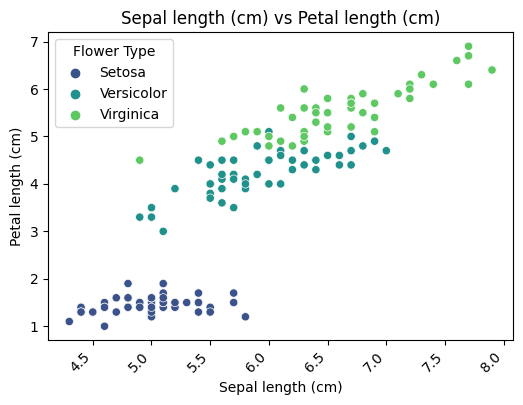

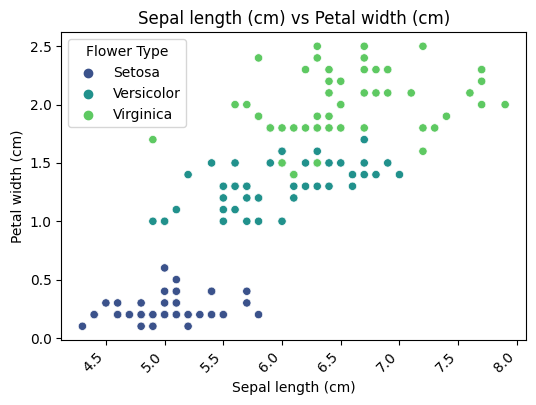

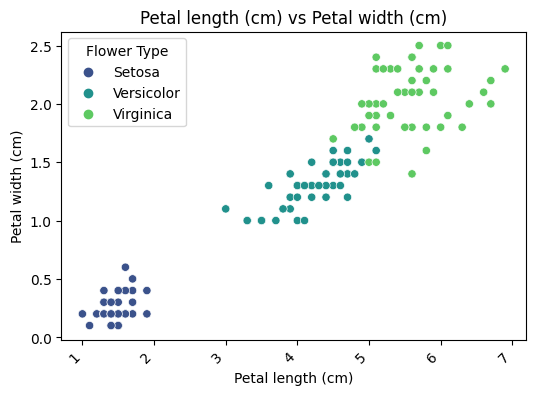

In [57]:
# Repeat the above scatter plot for all pairs of features

import pandas as pd
import sklearn.datasets as source
import matplotlib.pyplot as plt
import seaborn as sns

# use pandas to describe the dataset. verify with the above.


data = source.load_iris()
df = pd.DataFrame(data = data['data'], columns = data.feature_names)
df['Target'] = data.target

# Mapping target numbers to flower names
target_names = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
df['Flower_Name'] = df['Target'].map(target_names)

# Display DataFrame information
df.info()

# 1) sepal length in cm vs petal length in cm
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='Flower_Name', palette='viridis')
plt.title('Sepal length (cm) vs Petal length (cm)')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.legend(title='Flower Type')
plt.xticks(rotation=45, ha='right')
plt.show()

# 2) sepal length in cm vs petal width in cm
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='sepal length (cm)', y='petal width (cm)', hue='Flower_Name', palette='viridis')
plt.title('Sepal length (cm) vs Petal width (cm)')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend(title='Flower Type')
plt.xticks(rotation=45, ha='right')
plt.show()

# 3) petal length in cm vs petal width in cm
plt.figure(figsize=(6,4))
plt.title('Petal length (cm) vs Petal width (cm)')
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='Flower_Name', palette='viridis')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend(title='Flower Type')
plt.xticks(rotation=45, ha='right')
plt.show()

In [58]:
# Create two new features
# sepal area = sepal length x sepal width,
df['sepal area (cm^2)'] = df['sepal length (cm)'] * df['sepal width (cm)']
# petal area = petal length x petal width
df['petal area (cm^2)'] = df['petal length (cm)'] * df['petal width (cm)']

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Flower_Name,sepal area (cm^2),petal area (cm^2)
0,5.1,3.5,1.4,0.2,0,Setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,0,Setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,0,Setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,0,Setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,0,Setosa,18.00,0.28


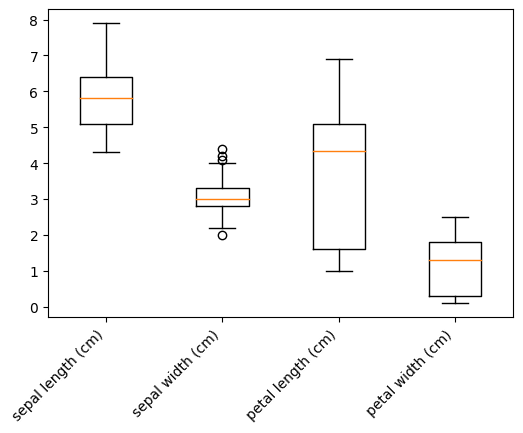

In [59]:
# Use boxplot for each feature plot in the same plot different

plt.figure(figsize=(6,4))
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
plt.boxplot([df['sepal length (cm)'], df['sepal width (cm)'], df['petal length (cm)'], df['petal width (cm)']])
plt.xticks([1,2,3,4], features, rotation=45, ha='right')
plt.show()


In [60]:
# Find the average of each feature (including petal area, sepal area) for each class
# and compare with the average of the complete dataset

avg_sepal_length = df.groupby('Flower_Name')['sepal length (cm)'].mean()
avg_sepal_width = df.groupby('Flower_Name')['sepal width (cm)'].mean()
avg_petal_length = df.groupby('Flower_Name')['petal length (cm)'].mean()
avg_petal_width = df.groupby('Flower_Name')['petal width (cm)'].mean()
avg_petal_area = df.groupby('Flower_Name')['petal area (cm^2)'].mean()
avg_sepal_area = df.groupby('Flower_Name')['sepal area (cm^2)'].mean()

# Table of average values
avg_df = pd.DataFrame({'Sepal Length': avg_sepal_length, 'Sepal Width': avg_sepal_width,
                       'Petal Length': avg_petal_length, 'Petal Width': avg_petal_width,
                       'Petal Area': avg_petal_area, 'Sepal Area': avg_sepal_area})
avg_df.head()


,Sepal Length,Sepal Width,Petal Length,Petal Width,Petal Area,Sepal Area
Flower_Name,,,,,,
Setosa,5.006,3.428,1.462,0.246,0.3656,17.2578
Versicolor,5.936,2.770,4.260,1.326,5.7204,16.5262
Virginica,6.588,2.974,5.552,2.026,11.2962,19.6846


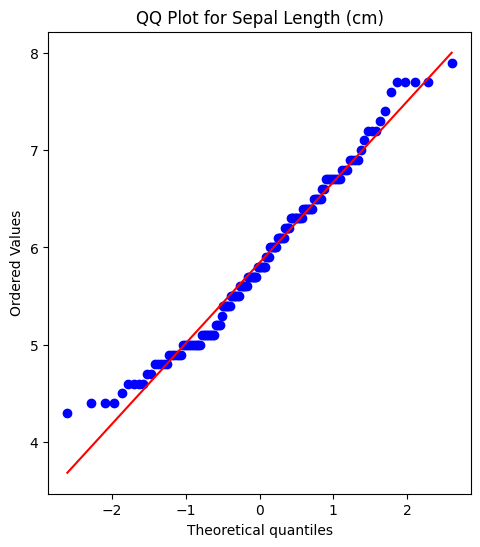

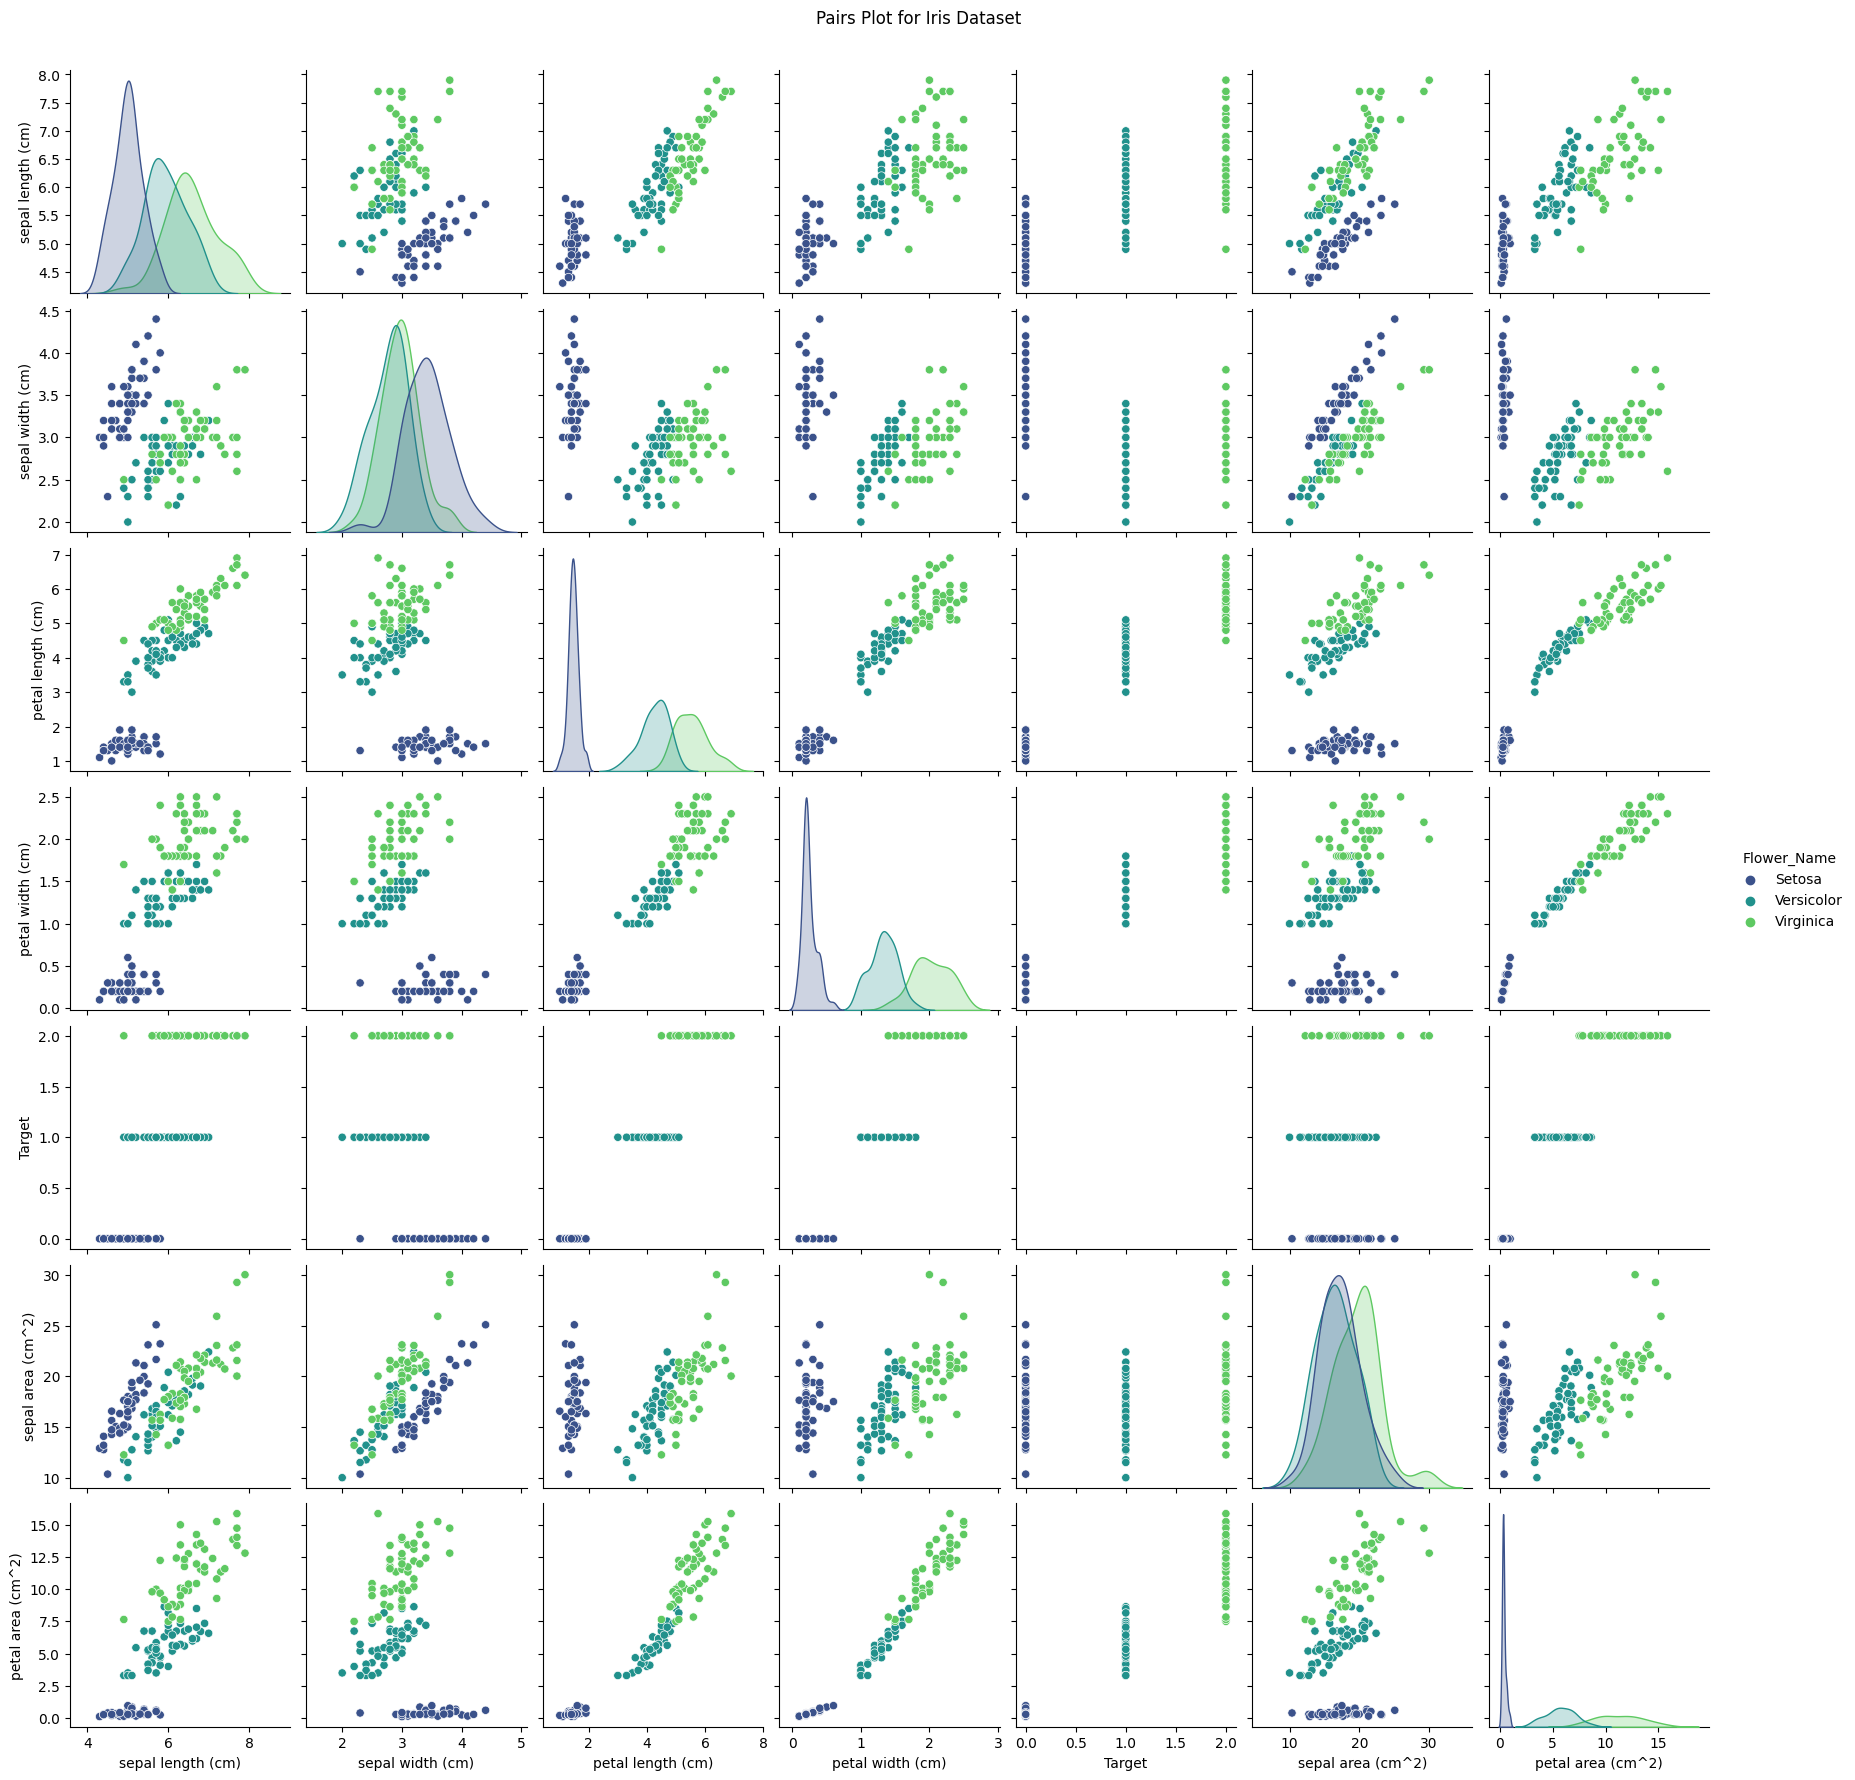

In [61]:
# Check what is QQ plot and plot pair of features
from scipy.stats import probplot

# QQ plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
probplot(df['sepal length (cm)'], plot=plt)
plt.title('QQ Plot for Sepal Length (cm)')

# Pairs plot
plt.subplot(1, 2, 1)
sns.pairplot(df, hue='Flower_Name', palette='viridis')
plt.suptitle('Pairs Plot for Iris Dataset', y=1.02)
plt.show()

## Experiment 2

Load Melbourne housing dataset supplied alongwith. The filename is "real_estate.csv" file. You may use either pandas or numpy.

In [62]:
import pandas as pd

df = pd.read_csv('real_estate.csv')
df.head()

,Address,Rooms,Price,Bedroom2,Bathroom,Landsize,YearBuilt,Regionname,Suburb,Type
0,85 Turner St,2,1480000,2,1,202,NaN,Northern Metropolitan,Abbotsford,h
1,25 Bloomburg St,2,1035000,2,1,156,1900.0,Northern Metropolitan,Abbotsford,h
2,5 Charles St,3,1465000,3,2,134,1900.0,Northern Metropolitan,Abbotsford,h
3,40 Federation La,3,850000,3,2,94,NaN,Northern Metropolitan,Abbotsford,h
4,55a Park St,4,1600000,3,1,120,2014.0,Northern Metropolitan,Abbotsford,h


### Unique Identifier
- Address (replace the address with a unique number)
### Features of the dataset
- Rooms
- Price
- Number of Bedrooms
- Number of Bathrooms
- Land size
- Year built
- Region name
- Sub urban name
### Target variable (output variable t)
- Type of House
  - h - house, cottage, villa, semi, terrace
  - u - unit, duplex
  - t - townhouse

In the above dataset,
- Convert the "Year built" into a categorical data
  - the houses built before 1800 is given 8
  - the houses built from 1800 to 1850 is given 7
  - the houses build from 1850 to 1900 is given 6
  - the houses built between 1900 to 1920 is given as 5
  - the houses built between 1920 to 1950 is given as 4
  - the houses built between 1950 to 1980 is given as 3
  - the houses built between 1980 to 2000 is given as 2
  - the houses built between 2000 to 2023 is given as 1
  - if there is no data on house built consider it as 0
- Use normalization techniques used in previous lab for "price" and "lab-size"?
- Choose any one "Region name" for that answer following questions
  - Which is the dominant house-type?
  - what is the average cost of different types of house?
  - Use scatter plot for the following pair of features
    - price vs number of bedrooms
    - price vs number of bathrooms
    - land size vs price

In [63]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

# Encode the categorical features
le = LabelEncoder()
df['Address'] = le.fit_transform(df['Address'])


In [64]:
def year_mapping(x):
    if x < 1800:
        return 8
    elif  1800 <= x <= 1850:
        return 7
    elif  1851 <= x <= 1900:
        return 6
    elif 1901 <= x <= 1920:
        return 5
    elif 1921 <= x <= 1950:
        return 4
    elif 1951 <= x <= 1980:
        return 3
    elif 1981 <= x <= 2000:
        return 2
    elif 2001 <= x <= 2023:
        return 1
    else :
        return 0

# To change Year built column to categorical data
df["YearBuilt"] = df["YearBuilt"].apply(year_mapping).fillna(0)



Most Dominant House Type : h
Average Cost of House : Type
h    950766.265939
t    720951.046025
u    488414.424821
Name: Price, dtype: float64


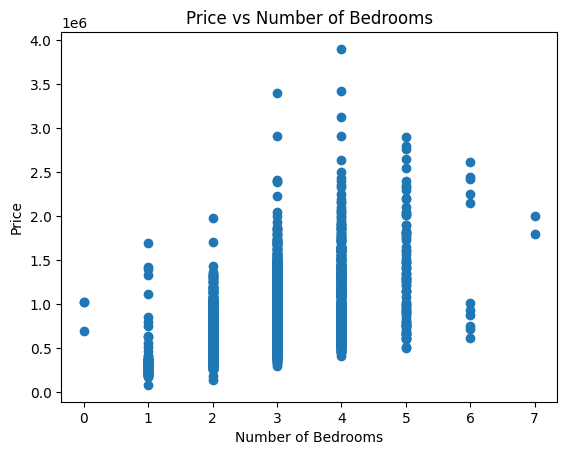

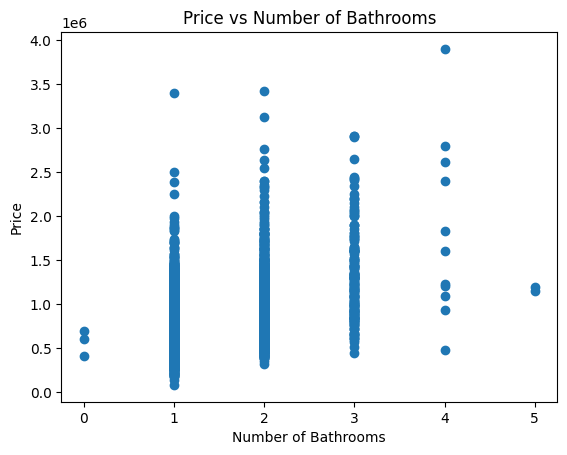

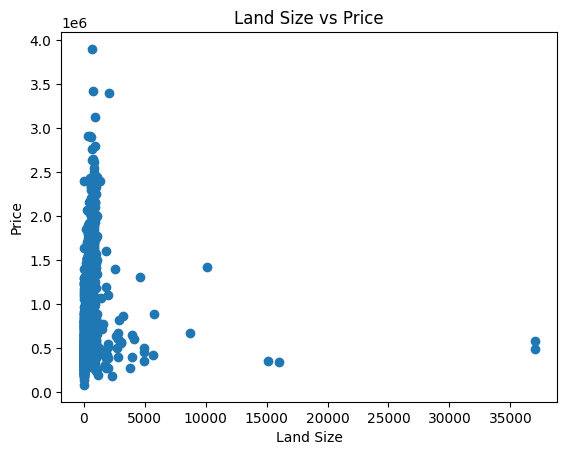

In [65]:
# Filter the dataframe based on the region name
region_df = df[df["Regionname"] == "Western Metropolitan"]

dominant_house_type = region_df["Type"].mode()[0]
print(f"Most Dominant House Type : {dominant_house_type}")

average_cost = region_df.groupby("Type")["Price"].mean()
print(f"Average Cost of House : {average_cost}")

# Scatter plot: price vs number of bedrooms
plt.scatter(region_df["Bedroom2"], region_df["Price"])
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.title("Price vs Number of Bedrooms")
plt.show()

# Scatter plot: price vs number of bathrooms
plt.scatter(region_df["Bathroom"], region_df["Price"])
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price")
plt.title("Price vs Number of Bathrooms")
plt.show()

# Scatter plot: land size vs price
plt.scatter(region_df["Landsize"], region_df["Price"])
plt.xlabel("Land Size")
plt.ylabel("Price")
plt.title("Land Size vs Price")
plt.show()


In [66]:
min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()

# Price : Used Standard Scaler, Price is scaled from mean
df["Price"] = std_scaler.fit_transform(df[["Price"]])

# Landsize : Used MinMax Scaler, Landsize is scaled from 0 to 1
df["Landsize"] = min_max_scaler.fit_transform(df[["Landsize"]])


df.head()

,Address,Rooms,Price,Bedroom2,Bathroom,Landsize,YearBuilt,Regionname,Suburb,Type
0,12794,2,0.632448,2,1,0.000466,0,Northern Metropolitan,Abbotsford,h
1,5943,2,-0.063640,2,1,0.000360,6,Northern Metropolitan,Abbotsford,h
2,9814,3,0.608984,3,2,0.000309,6,Northern Metropolitan,Abbotsford,h
3,9004,3,-0.353025,3,2,0.000217,0,Northern Metropolitan,Abbotsford,h
4,10589,4,0.820157,3,1,0.000277,1,Northern Metropolitan,Abbotsford,h


## Covariance matrix
Create a numpy array with 3 features land size, price, number of bedrooms. the size of the array will be 3xN. N is the number of samples.

An example of how to find the covariance matrix is given below:

In [67]:
import numpy as np
# Here number of samples is 5 and 3 features
x1 = [4.01, -10.2,  -4.3, 8.4, 3.1] # feature 1
x2 = [2.3,  11.1,  6.12, -0.123, 0.97] # feature 2
x3 = [9.0, 7.1, -7.1, -9.87, 6.23] # feature 3
X = np.stack((x1, x2, x3), axis=0)
np.cov(X)
# This gives the correlation between features
# A(2,3) gives the relation between feature 2 and 3
# A(2,2) gives the variance in feature 2
# Browse through and find out why this matrix is much needed in machine learning

array([[ 54.64402  , -33.1133335, -17.61943  ],
       [-33.1133335,  20.9868728,  10.3704215],
       [-17.61943  ,  10.3704215,  78.07597  ]])

In [68]:
import numpy as np

features = ['Landsize', 'Price', 'Bedroom2']
arr = np.array(df[features]).T

# Covariance matrix
cov_mat = np.cov(arr)
print(f"Covariance Matrix : \n{cov_mat}\n")

Covariance Matrix : 
[[8.49351760e-05 3.45682446e-04 2.28301763e-04]
 [3.45682446e-04 1.00007364e+00 4.59748054e-01]
 [2.28301763e-04 4.59748054e-01 9.33003497e-01]]



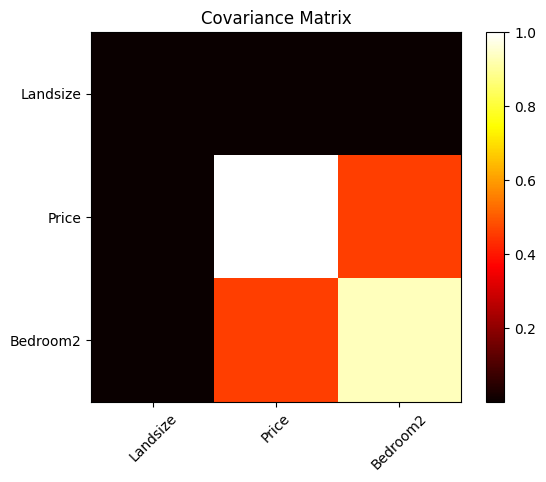

In [69]:
#  Visualise the covariance matrix
import matplotlib.pyplot as plt

plt.imshow(cov_mat, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(features)), features, rotation=45)
plt.yticks(range(len(features)), features)
plt.title('Covariance Matrix')
plt.show()

### Find the covariance matrix for entire real_estate database.

                Address      Rooms       Price   Bedroom2   Bathroom   
Address    1.489737e+07  73.836426  189.852416  59.105619  15.108600  \
Rooms      7.383643e+01   0.913454    0.474674   0.871655   0.391990   
Price      1.898524e+02   0.474674    1.000074   0.459748   0.323068   
Bedroom2   5.910562e+01   0.871655    0.459748   0.933003   0.390651   
Bathroom   1.510860e+01   0.391990    0.323068   0.390651   0.478465   
Landsize   1.733883e-01   0.000226    0.000346   0.000228   0.000237   
YearBuilt  2.176661e+02   0.046326    0.256765   0.034478  -0.033262   

           Landsize   YearBuilt  
Address    0.173388  217.666082  
Rooms      0.000226    0.046326  
Price      0.000346    0.256765  
Bedroom2   0.000228    0.034478  
Bathroom   0.000237   -0.033262  
Landsize   0.000085   -0.000359  
YearBuilt -0.000359    3.552879  


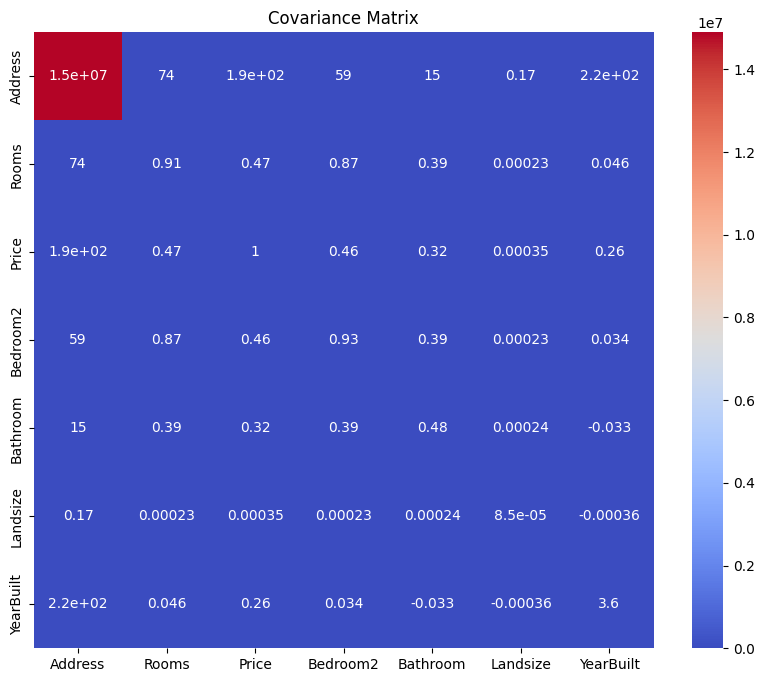

In [70]:
import seaborn as sns
# Calculate covariance matrix for numeric columns only
numeric_df = df.select_dtypes(include=np.number)
cov_matrix = numeric_df.cov()
print(cov_matrix)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm')
plt.title('Covariance Matrix')
plt.show()


## Basic linear algebra
- Find the eigen values of the covariance matrix of the entire dataset (use eigen value decomposition)
- Find the singular values of the covariance matrix of the entire dataset

In [71]:
import numpy as np

# Calculate the covariance matrix
cov_matrix = np.cov(df.select_dtypes(include=np.number), rowvar=False)

# Perform eigenvalue decomposition
eigenvalues, _ = np.linalg.eig(cov_matrix)

# Perform singular value decomposition
singular_values = np.linalg.svd(cov_matrix, compute_uv=False)

# Print the eigenvalues and singular values
print("Eigenvalues:")
print(eigenvalues)
print("\nSingular Values:")
print(singular_values)


Eigenvalues:
[1.48973740e+07 3.58435012e+00 2.36246746e+00 6.13586892e-01
 2.60050963e-01 5.12049029e-02 8.47232993e-05]

Singular Values:
[1.48973740e+07 3.58435012e+00 2.36246746e+00 6.13586892e-01
 2.60050963e-01 5.12049029e-02 8.47232993e-05]
